<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Description</a></span><ul class="toc-item"><li><span><a href="#Text-Dataset" data-toc-modified-id="Text-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Text Dataset</a></span></li><li><span><a href="#Citation-Graph" data-toc-modified-id="Citation-Graph-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Citation Graph</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Text-Analysis" data-toc-modified-id="Text-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Text Analysis</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Preprocessing-Steps-for-Stastical-Baseline" data-toc-modified-id="Preprocessing-Steps-for-Stastical-Baseline-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Preprocessing Steps for Stastical Baseline</a></span></li></ul></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Baseline</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#A-simple-heuristic" data-toc-modified-id="A-simple-heuristic-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>A simple heuristic</a></span></li></ul></li><li><span><a href="#Baseline-Metrics" data-toc-modified-id="Baseline-Metrics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline Metrics</a></span><ul class="toc-item"><li><span><a href="#Discussion" data-toc-modified-id="Discussion-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li></ul></li><li><span><a href="#Retrival-and-Ranking-Models" data-toc-modified-id="Retrival-and-Ranking-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Retrival and Ranking Models</a></span><ul class="toc-item"><li><span><a href="#Metrics-and-Results" data-toc-modified-id="Metrics-and-Results-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Metrics and Results</a></span><ul class="toc-item"><li><span><a href="#Discussion" data-toc-modified-id="Discussion-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></div>

# Data Science for Case Law:  Automatic Citation Treatment Analysis


** Project authors **

- [Ramanathan Parameshwaran](rap940@g.harvard.edu)
- [Malla Reddy Adaboina](maa0192@g.harvard.edu)
- [Paul Tembo](paultembo@g.harvard.edu)
- [Christy Chou](chrichou33@gmail.com)


# About this notebook

This notebook is our code report that documents our attempts at different approaches to tackling the problem of Automatic citation treatement analysis in the legal domain using the case law access project dataset. Due to the complexity inherent to the citation of case laws and the limited scope, this work can only be thought of as an experimental proof-of-concept study that leverages advancements in NLP to automate a very complex task. 


** A note about supporting notebooks **

This is a summary and reporting notebook. The detailed anlaysis done and code written towards this work are in supplemental the following supplemental notebooks and documents.

- [EDA and Baseline](../notebooks/grp9-milestone-2-submission.ipynb)
- [Graph Analysis](../notebooks/grp-9-final-submission-graph-analysis.ipynb)
- [Classification Model](../notebooks/clf_trainer.ipynb)
- [Analysis]()

    

** A note about supporting custom python modules **

We add utilities and modules in the `/src` directory where this code report exisits. These modules allow us to keep the code minimal in the notebook.



# Problem Statement

After initial exploration and cleansing of the available data, we have focused our efforts on the following problem statement:

- Use Information retreival methods and Natural Language processing to *predict relevant citations based on case facts - headnotes and opinion text*.



# Summary of findings

Based on the experiments and analysis we have run we understand the complexity of the problem of citation analysis and the challenges in the domain. Citations in caselaws are more than just content similarity. This is clearly reflected in our results. We achieve very poor mean average precision scores leading us to look deeper into the fallacies in our approach. We believe this needs more stringent study with indepth analysis. Furthermore, access to larger datasets could open the avenue to train models on the case law citation treatement task.

## Introduction

Central to winning a case before the United States court system one must put forth a compelling argument(s), the key driver of these arguments are court briefs or memos . The Memo is the primary tool  to deliver one case as to why the courts should side with them in the matter before the court. 

As such the parties before the court must strive to make sure they make their best arguments through the memos and briefs. One key element is not to make sure that the appropriate case law is cited in a manner that is relevant but also allows the judge(s) to find the case fairly easily.  The goal is to through legal citation provide the judges with the most relevant case information to help them make decisions as well as reference that material in a precise manner (Cornell,2021).  The reason for this is that the memo reading stage is when justices get the best chance to examine the argument being put forward , in fact some Justices like Associate Supreme Court Justice Clarence Thomas are famed for focussing on the briefs as the primary tool for making their decision which way to cast their vote (New York Times , 2015) . Others have argued that justices sometimes use the memos as templates for the opinions they write when deciding the cases. Also, some justices have noted that memos are almost always the full 50 pages length in the supreme court and that they are pleasantly surprised when they see a 35 page memo, this trend to always use up the full 50 recommended pages limit is a sign that maybe folks are pulling any and every case that is remotely related to their case and hoping that one or more of those cases resonates with the judges.All these reasons set forth above form our study question - can we use Natural Language processing to help make this lawyers generate law case citations and as such present their best case by citing the cases that give them the best chance of winning the case?

Our goal here is to use Natural Language processing (NLP henceforth) to predict  which cases are most relevant to a case based on a limited set of text that represents the facts of the case. Natural language processing is a field that combines linguistics and computer science that gives us the tools that allows us to take text as input and generate output text in a desired format. In our specific case we will take in case relevant text and generate a list of law cases with their case name, court , jurisdiction etc ,with the most relevant cases listed at the top.


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter(action='ignore', category=Warning)

import json
import os

import numpy as np
import pandas as pd

import data_utils
import model_utils
import baseline
import metrics

## Data Description


> CAP includes all official, book-published United States case law — every volume designated as an official report of decisions by a court within the United States.
>
>Each volume has been converted into structured, case-level data broken out by majority and dissenting opinion, with >human-checked metadata for party names, docket number, citation, and date.
>
> -- <cite>[Case.law][1]</cite>

### Text Dataset

This is the primary dataset we deal with in this notebook.

In the scope of this analysis we use the latest open case text from from bulk data exxports of open jurisdictions in the dataset. This subset consists of caselaws and metadata for the following four Jurisdictions:

1. ark - Arkansas
2. ill - Illinois
3. nc - North Carolina
4. nm - New Mexico

These were downloaded from [here][2].

Detailed code related to data download and analysis can be found in the [EDA and Baseline Notebook](../notebooks/grp9-milestone-2-submission.ipynb) . 

Additionally, supporting preprocessing functions can be located at [data_utils.py](../src/data_utils.py)


### Citation Graph

In addition to the case text we also use the case citation graph that links extracted, verified and unambiguous  citations to cases within the dataset. We use the citation graph from [2021-04-20][3] for this study. The citation graph is present in the form of a edgelist linking one case_id to multiple case_ids. It also contains all the references to all nodes from the case.law dataset. We truncate the graph based on case_ids we found in the case texts for each jurisdiction during preprocessing.


More detailed steps to repoduce the graph analysis part can be found in the [Graph Analysis Notebook](grp-9-final-submission-graph-analysis.ipynb)

Note this was not included in the notebook due to issues related to loading docker on remote machines.

[1]: https://case.law/about/
[2]: https://case.law/download/bulk_exports/latest/by_jurisdiction/case_text_open/
[3]: https://case.law/download/citation_graph/2021-04-20/


In [2]:
DATASET_DIR = "../data"
SUBSET_DIR = f"{DATASET_DIR}/subset"
SUBSET_DIRS = ["ark", "ill", "nc", "nm"]

TEXT_FILES = [f"{DATASET_DIR}/{sub_dir}/{sub_dir}_text.zip" for sub_dir in SUBSET_DIRS]
CITATION_GRAPH_FILE = f"{DATASET_DIR}/citations.csv.gz"
CITATION_METADATA_FILE = f"{DATASET_DIR}/metadata.csv.gz"

MODELS_DIR = "../models"


SAVE_FILES = False

In [3]:
print(f"\nLoading cases from text files at {SUBSET_DIR}\n")

cases_data = data_utils.load_cases(TEXT_FILES)

print(f"\nTotal number of cases in the raw dataset : {len(cases_data)}")
print(f"Total number of columns in the raw dataset : {len(cases_data.columns)}\n")


Loading cases from text files at ../data/subset

Loaded 59735 cases from ark_text.zip
Loaded 183033 cases from ill_text.zip
Loaded 97600 cases from nc_text.zip
Loaded 18338 cases from nm_text.zip

Total number of cases in the raw dataset : 358706
Total number of columns in the raw dataset : 17



In [4]:
# view the first case
sample_case = cases_data.iloc[0, :].to_json()
# fix for escape chars
sample_case = json.dumps(json.loads(sample_case), indent=2)
print("\n" + "#" * 40 + " SAMPLE_RECORD " + "#" * 40 + "\n")
print(sample_case)
print("\n" + "#" * 90 + "\n")


######################################## SAMPLE_RECORD ########################################

{
  "id": 1869772,
  "url": "https://api.capapi.org/v1/cases/1869772/",
  "name": "James Joseph STANDLEY, Jr. v. STATE of Arkansas",
  "name_abbreviation": "Standley v. State",
  "decision_date": "1987-11-09",
  "docket_number": "",
  "first_page": "517",
  "last_page": "518",
  "citations": [
    {
      "cite": "293 Ark. 517",
      "type": "official"
    },
    {
      "cite": "738 S.W.2d 423",
      "type": "parallel"
    }
  ],
  "volume": {
    "volume_number": "293",
    "barcode": "32044078577145",
    "url": "https://api.capapi.org/v1/volumes/32044078577145/"
  },
  "reporter": {
    "id": 368,
    "full_name": "Arkansas Reports",
    "url": "https://api.capapi.org/v1/reporters/368/"
  },
  "court": {
    "name_abbreviation": "Ark.",
    "name": "Arkansas Supreme Court",
    "id": 8808,
    "slug": "ark",
    "url": "https://api.capapi.org/v1/courts/ark/"
  },
  "jurisdiction": {


Each caselaw record is represented by a unique id and contains metadata relating to `decision_date`, `volume`, `reporter`, `jurisdiction`, `court` in addition to the case text that comprises of the `head_matter` and `opinions`. We proceed with extracting the and data removing empty values and columns from the dataset before diving into the text and graph processing.


## Exploratory Data Analysis

Initally looks like `preview` and `docket_number` are sparse and don't really matter for the problem. We'll get the citation information after linking the citation graph.


Parsing dates from columns: 'decision_date'
Found record with date error


,url,name,name_abbreviation,decision_date,first_page,last_page,volume,reporter,court,jurisdiction,frontend_url,casebody
id,,,,,,,,,,,,
11269973,https://api.capapi.org/v1/cases/11269973/,STATE v. LESTER MORRIS,State v. Morris,1914-02-29,441,441,"{'volume_number': '166', 'barcode': '320440578...","{'id': 549, 'full_name': 'North Carolina Repor...","{'name_abbreviation': 'N.C.', 'name': 'Supreme...","{'name': 'N.C.', 'id': 5, 'slug': 'nc', 'name_...",https://cite.capapi.org/nc/166/441/,"{'status': 'ok', 'data': {'judges': [], 'head_..."


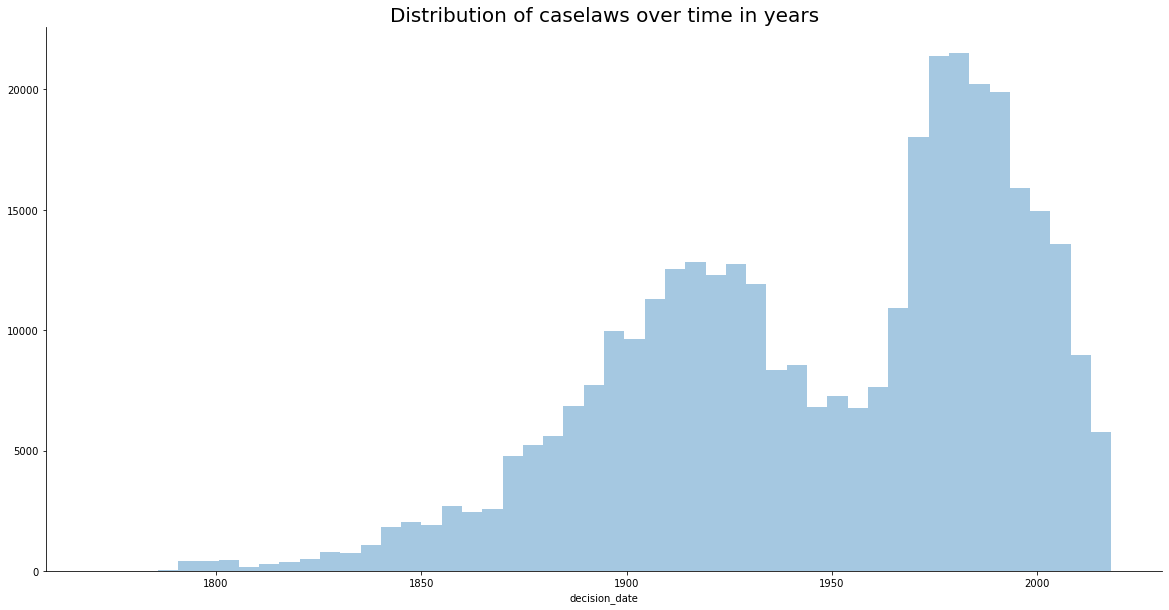

In [5]:
drop_cols = ["docket_number", "preview", "cites_to", "citations"]
cases_data = cases_data.drop(drop_cols, axis=1)

# convert the id to int for indexing
cases_data["id"] = cases_data["id"].astype(int)
cases_data = cases_data.set_index("id")

cases_data = data_utils.load_and_display_dates(cases_data)

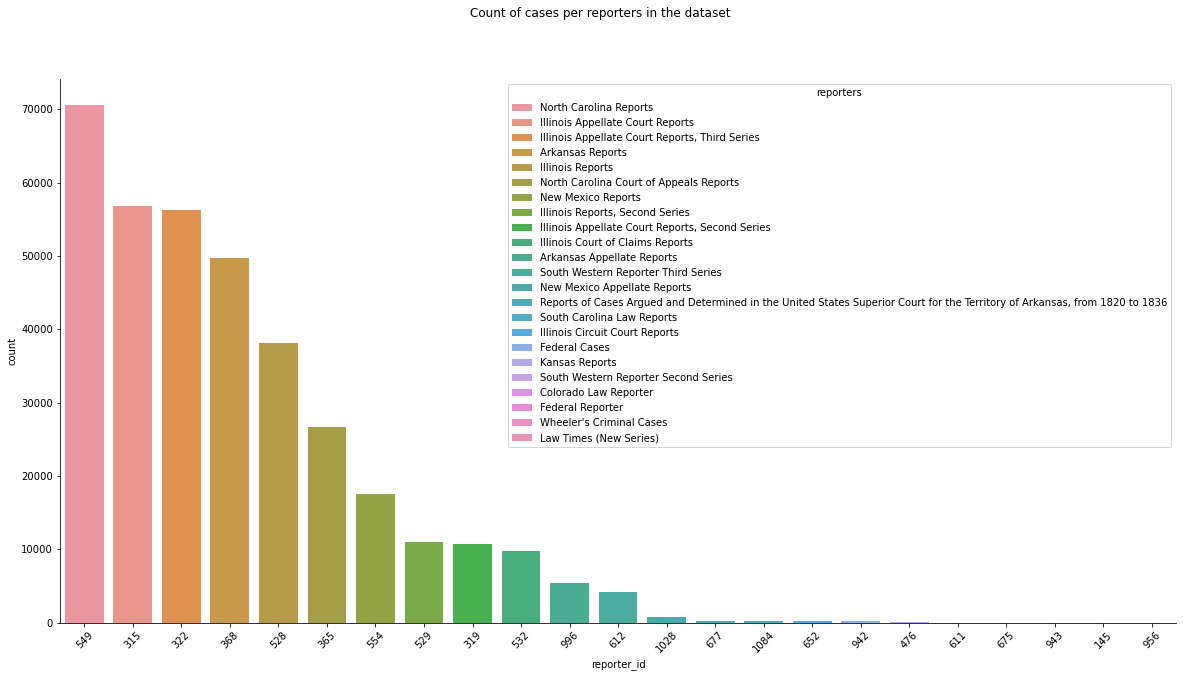

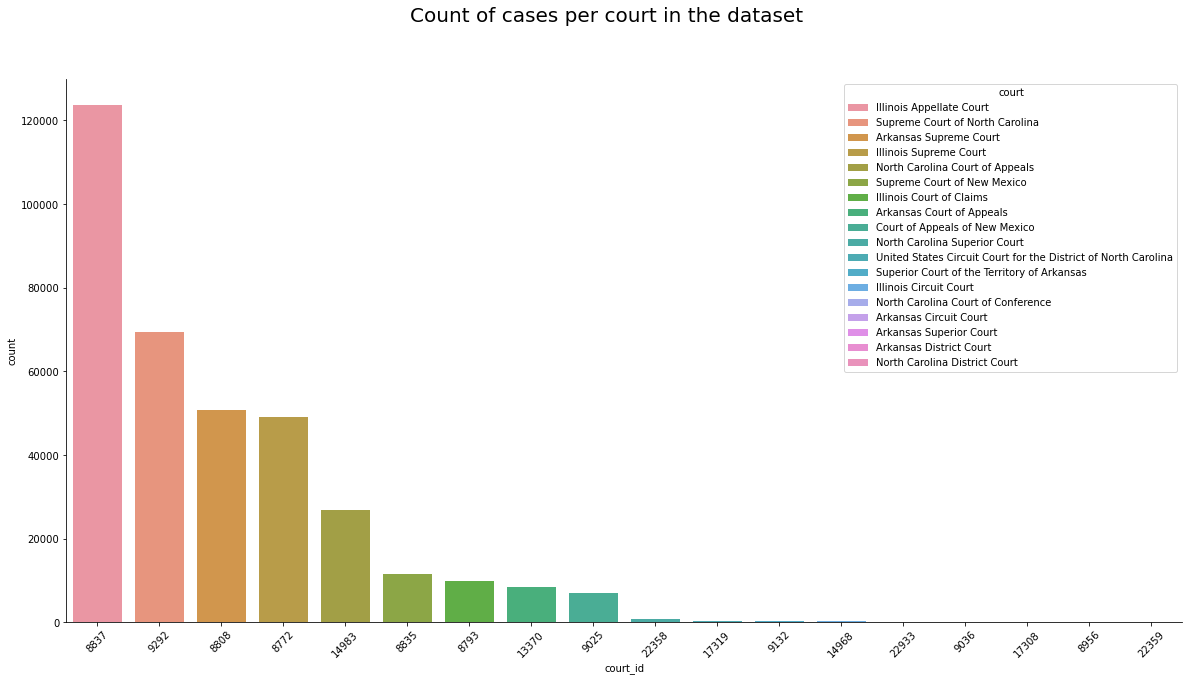

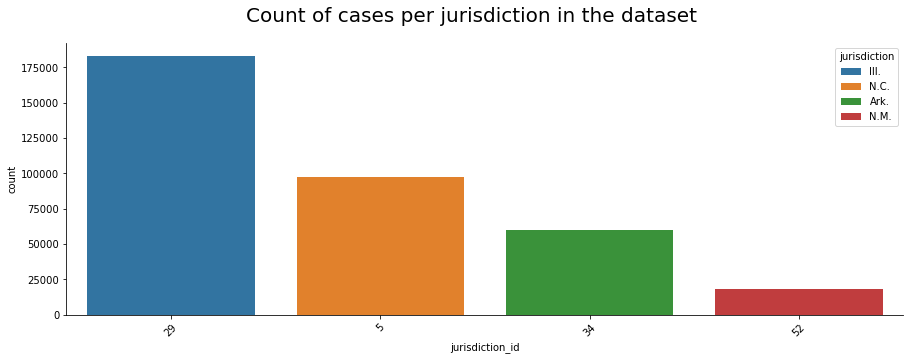

In [6]:
cases_data, volumes_data = data_utils.load_volumes(cases_data, SUBSET_DIR, SAVE_FILES)

cases_data, reporters_data = data_utils.load_and_display_reporters(
    cases_data, SUBSET_DIR, SAVE_FILES
)
cases_data, courts_data = data_utils.load_and_display_courts(
    cases_data, SUBSET_DIR, SAVE_FILES
)
cases_data, jurisdictions_data = data_utils.load_and_display_jurisdictions(
    cases_data, SUBSET_DIR, SAVE_FILES
)


North Carolina has fewest cases when compared to the other jurisdictions in the corpus.
Most of these are however reported by the same reporter.
Hence we observe that `North Carolina Reports` has the most number of cases associated with it in the dataset.
The dataset is skewed with Illinois having more that 175,000 cases while New Mexico has fewer that 25000 cases.



- Long tail distribution with 75% if texts falling under ~13578 characters
Which cases cite the most number of cases in the dataset?
**Discussion**

We observe that about 75% of the data has 10 or less citations. We also observe some cases citing more than a 100 citations. This needs further investigation.

**Discussion**

Some cases cite more than a hundred cases. This might be an anomaly. However, it's equally likely that it is also possible and many cases are referred to in a single caselaw. This naturally supports the idea that caselaws build use citations to build strong arguments.

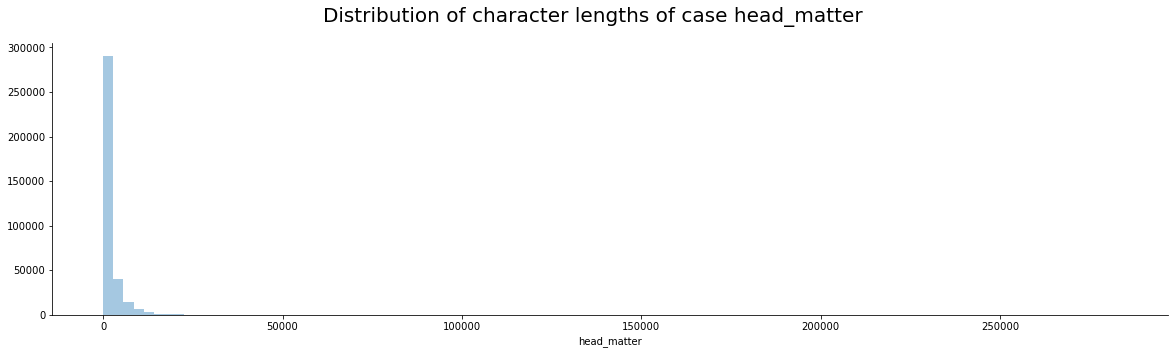


Summary statistics for head_matter lengths



,count,mean,std,min,25%,50%,75%,max
head_matter,358705.0,1803.8549,3346.039873,0.0,304.0,503.0,2069.0,282840.0


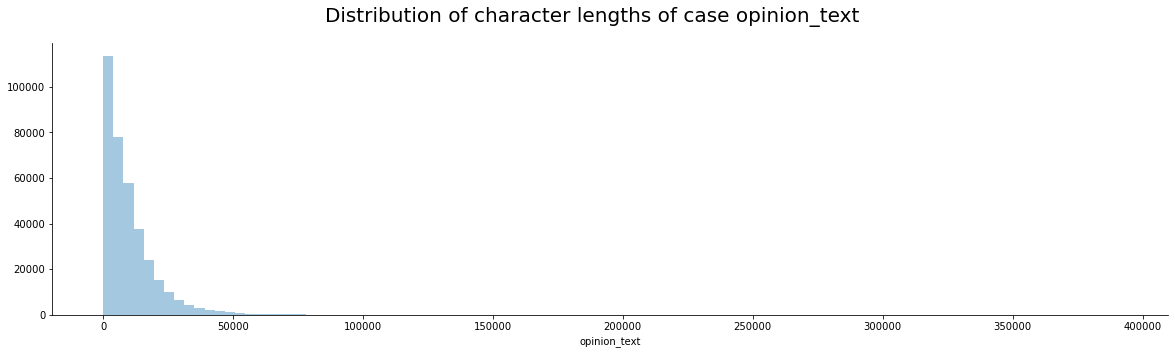


Summary statistics for opinion_text lengths



,count,mean,std,min,25%,50%,75%,max
opinion_text,358705.0,10023.012852,11310.61109,0.0,2732.0,7154.0,13578.0,390445.0





reading citation graph from file: ../data/citations.csv.gz
found and loaded 278778 nodes into citation_graph


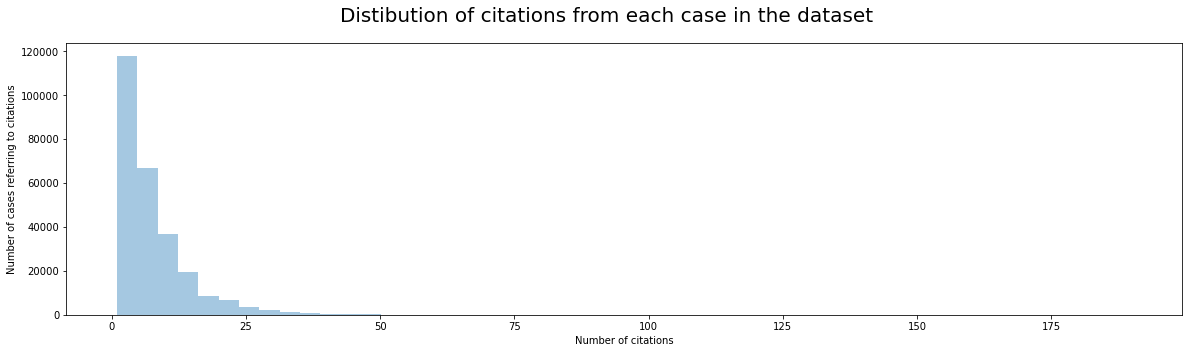


Summary statistics of citations from each caselaw



,count,mean,std,min,25%,50%,75%,max
citation_ids,265773.0,7.365594,7.31483,1.0,2.0,5.0,10.0,190.0


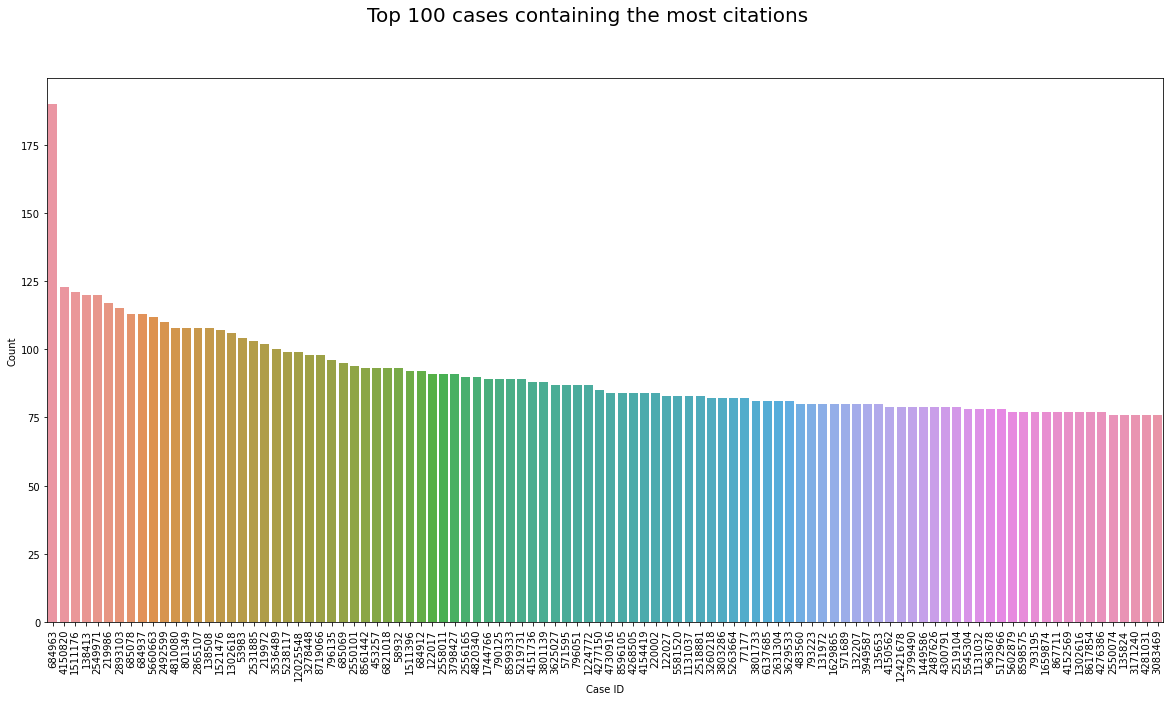



Loading preprocessed case text from ../data/subset/caselines.txt

Sample set of preprocessed case text



,text
0,dickenson dickenson absolute deed parol evidence admissible deed special trust valuable consideration david dickenso...
1,den demise arrington john alston nash devisee testator clause daughter tract land clause marriage land survivor case...
2,cherry slade administrator martin tile court venire facia novo jury special verdict evidence fact rule decision cour...
3,equity davis administrator means shanks caswell bequeath negro wife life negro increase equally son daughter decease...
4,equity daniel mcrae wake endorsers accommodation paper benefit person special agreement endorser cosuretie time endo...


In [7]:
cases_data = data_utils.load_and_display_text_cols(cases_data)

cases_data = data_utils.load_and_display_citations(
    cases_data, CITATION_GRAPH_FILE, SUBSET_DIR, SAVE_FILES
)
cases_data = cases_data.reset_index()
case_lines = data_utils.preprocess_text(
    cases_data, f_name=f"{SUBSET_DIR}/caselines.txt", overwrite=SAVE_FILES
)

data_utils.show_preprocessed_cases(case_lines)


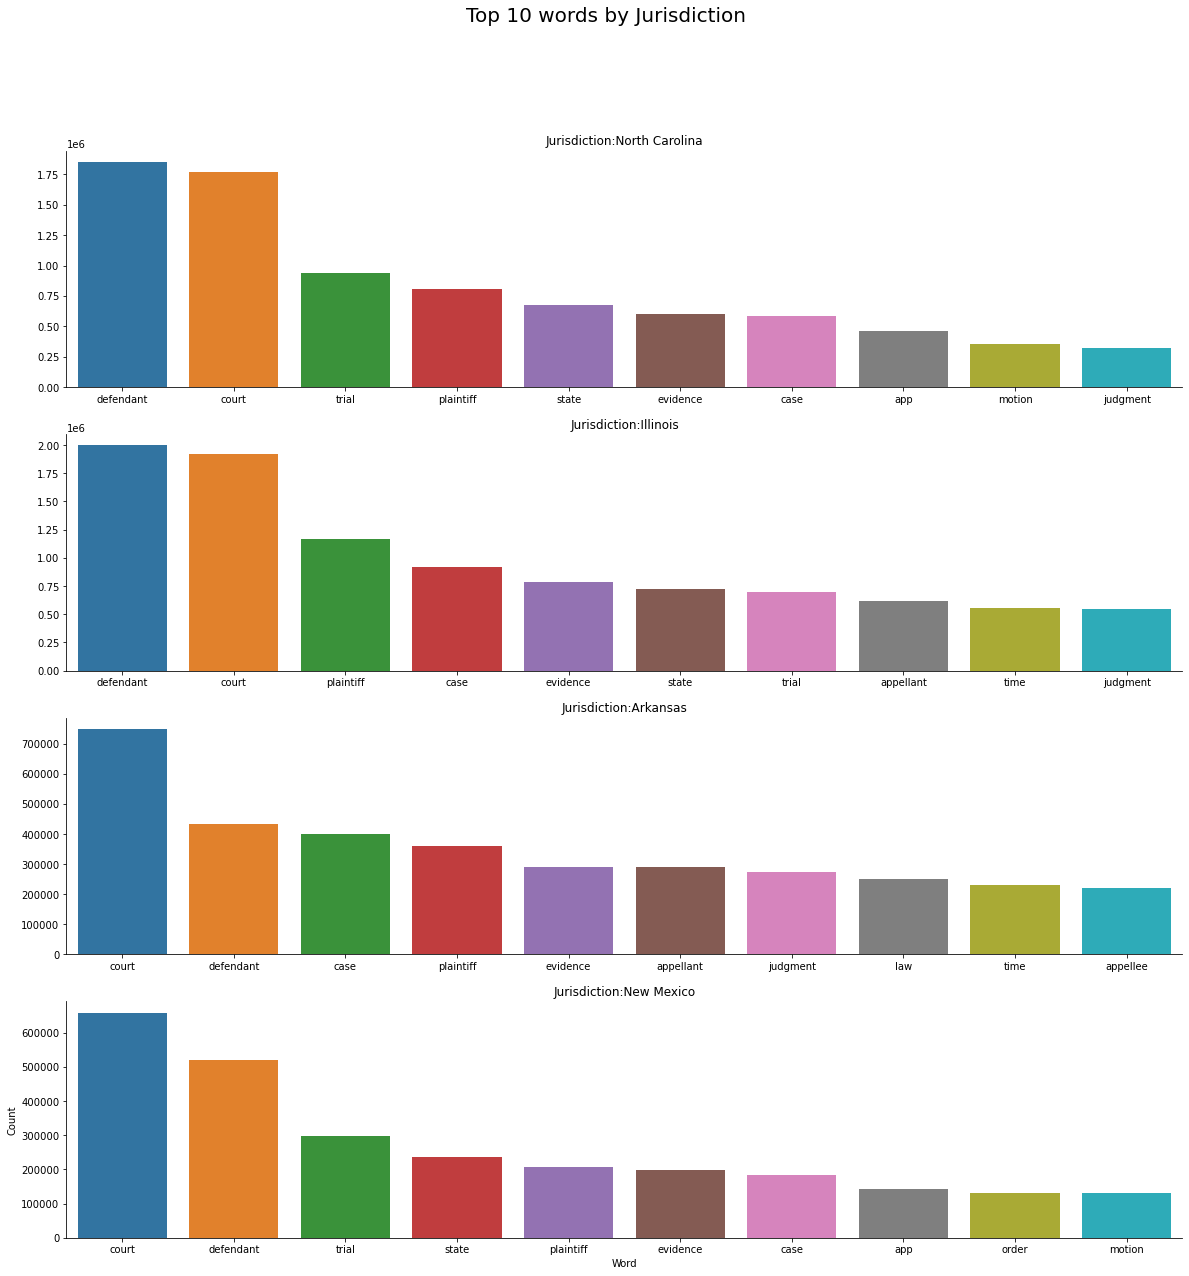

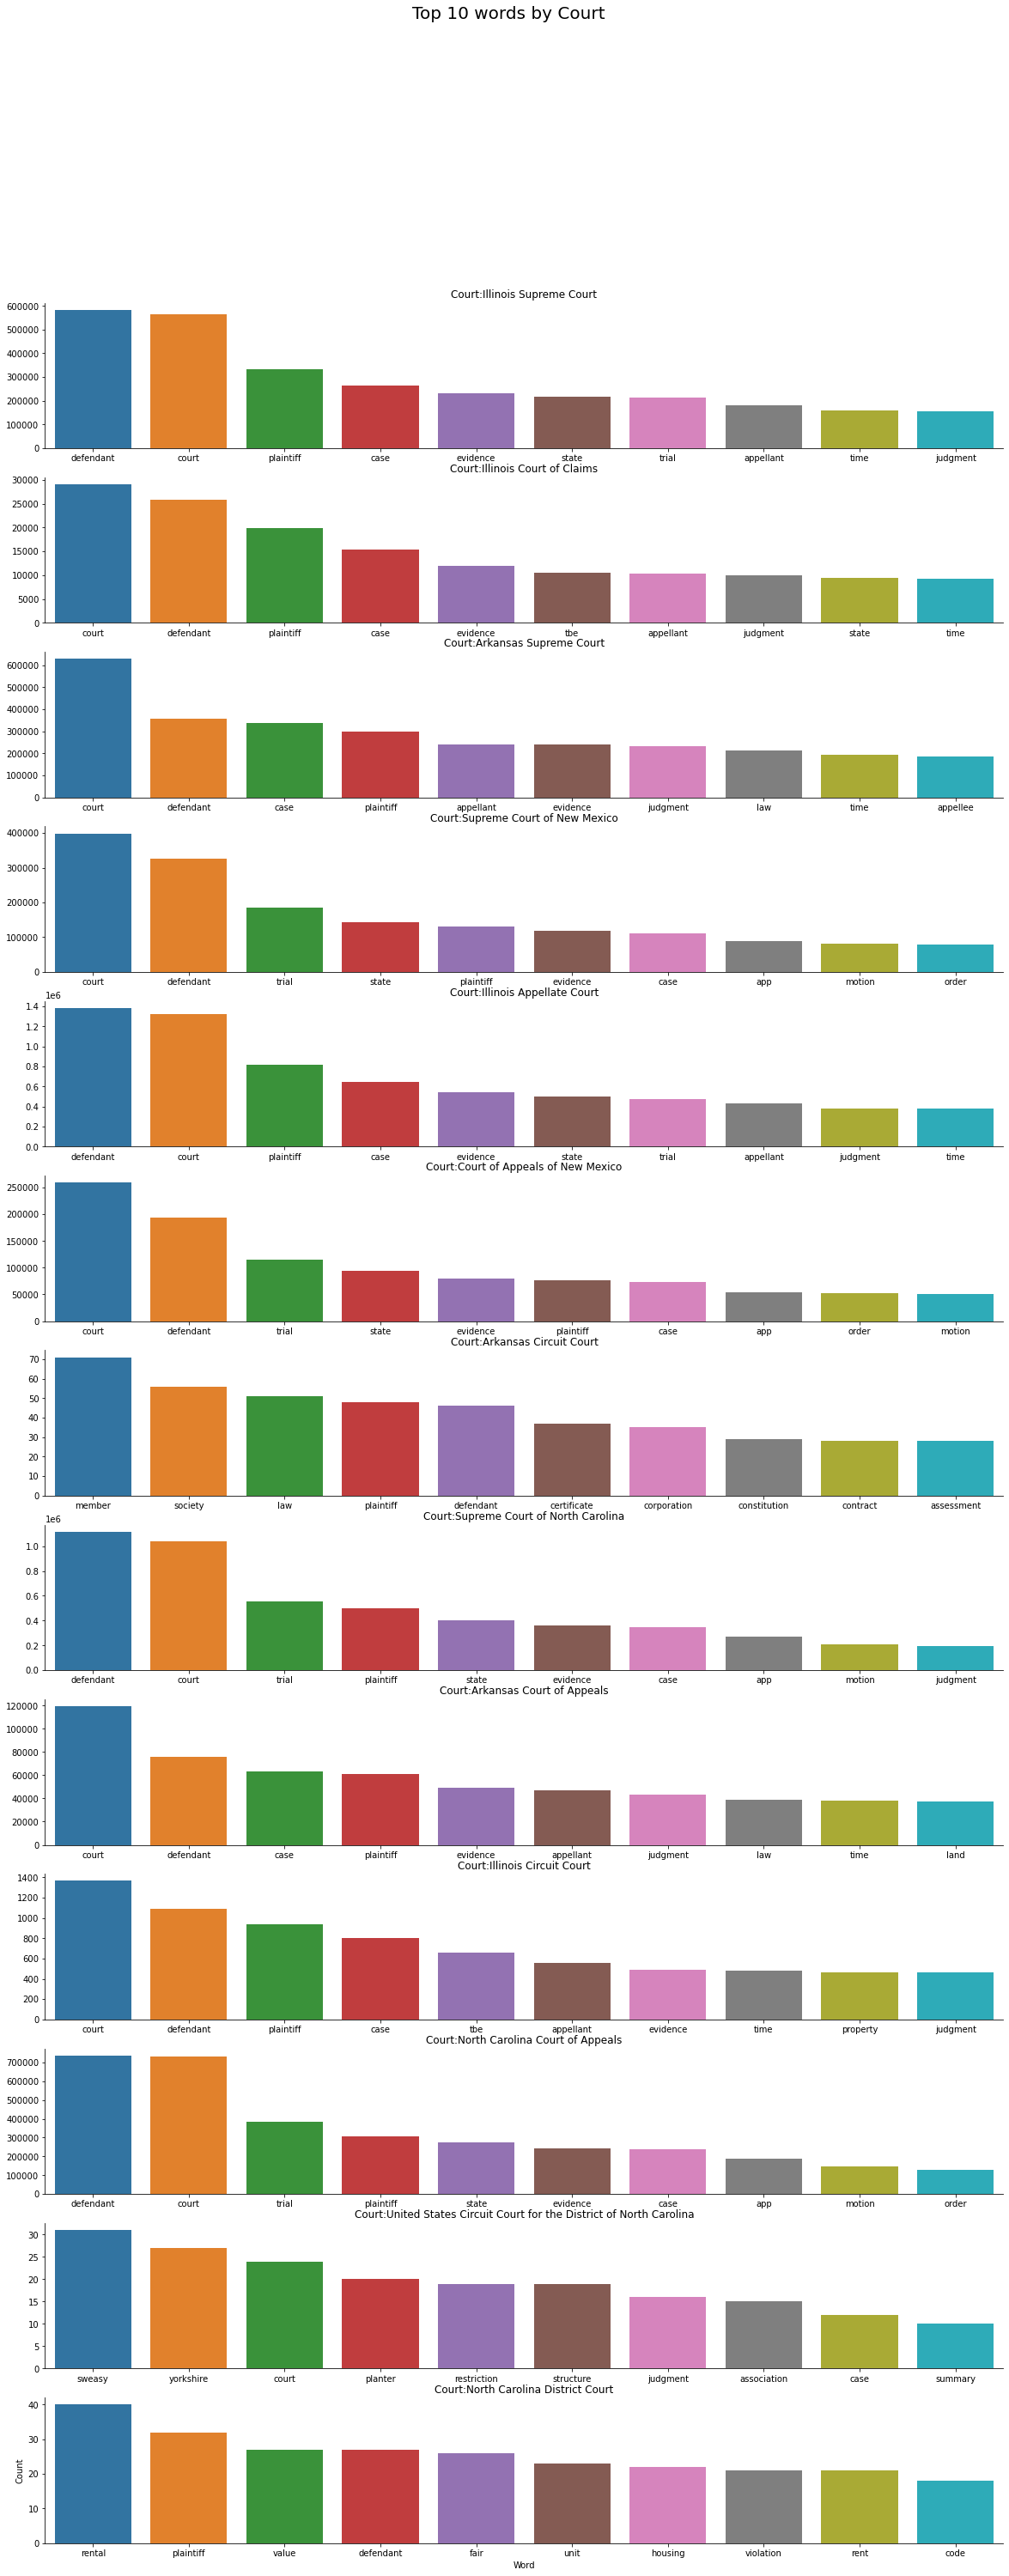

In [8]:
cases_data, case_lines = data_utils.sort_by_date(cases_data, case_lines)
data_utils.show_word_count_by_jurisdiction(cases_data, case_lines, jurisdictions_data)
data_utils.show_word_count_by_court(cases_data, case_lines, courts_data)

In [9]:
# case2idx, cases_data = data_utils.map_case2idx(cases_data)
# cases_data = data_utils.load_neg_case_idx(cases_data)
# cases_data = data_utils.truncate_cases_data(cases_data, SUBSET_DIR, save_files=False)

## Text Analysis

### Preprocessing

As we saw the case texts are quite large approx. (28k-50k characters). The texts also contaim misspellings and OCR errors. Additionally, we see hints from reviewing a few sample cases that there are mentions of person names, organizations and other entities such as dates in the case data that might be relevant in idenifying the facts of a case. To preprocess the text, we first concatenate the case text (`Head matter` and `Opinions`) into a single field and proceed to preprocess the text.

### Preprocessing Steps for Stastical Baseline
 - We parse the text applying POS tagging to the text using [spacy](https://spacy.io/).
 - We retain only words that are tagged as `Adjectives`, `Adverbs`, `Nouns`, `Proper Nouns` and `Pronouns`.
 - This reduces the vocabulary size and reduces the dimensionality of the data by a large factor and makes it feasable to work with the text in the dataset for our Exploratory analysis.

## Baseline

For the base line we create a bag of words model ...

**A Simple Baseline: Text Similarity for recommending citations.**

We hypothesize that cited caselaws often share similar vocabulary with the citing case text. This motivate us to explore a similarity metrics such since cosine similarity among document vectors to retrieve relevant documents given a query document.

**Methodology**

- We convert the preprocessed text to a bag-of-words representation. 
- The vocabulary contains ~538954 words. 
- We reduce the dimensionality of the data by pruning the vocabulary to retain the 50000 most common words. 
- Next we create TFIDF vectors of the documents and measure the cosine similarity of the tfidf vectors.
- We then compute the mean cosine similarity of a sample of documents in the corpus with their citations to answer the question- `How similar are cited cases to each other ?`

In [10]:
cases_data = pd.read_json(f"{SUBSET_DIR}/case_info.json", orient="records", lines=True)
case_lines = pd.read_csv(f"{SUBSET_DIR}/caselines.txt", header=None, names=["text"])

In [11]:
cite2idx = {k:v for v,k in cases_data["id"].items()}
idx2cite = {k:v for v,k in cite2idx.items()}
# json.dump(cite2idx, open(f"{SUBSET_DIR}/cite2idx.json", "w+"))
# json.dump(idx2cite, open(f"{SUBSET_DIR}/idx2cite.json", "w+"))

In [12]:
case_texts = baseline.load_case_texts(case_lines)

In [13]:
# train_df, val_df, test_df = data_utils.load_train_test_splits(None, SUBSET_DIR, save_files=False)

In [14]:
similarity_indexer = baseline.CosineSimilarityIndexer()
similarity_indexer = similarity_indexer.fit(case_texts.text.tolist())

In [15]:
sample_case_lines = case_lines.sample(1000)    
sample_cases = cases_data.loc[sample_case_lines.index]
sample_preds = similarity_indexer.predict(sample_case_lines.text.str.split())
sample_preds = sample_preds.toarray()

In [16]:
mean_sample_similarities = metrics.mean_citation_similarity(sample_cases, sample_preds)
print(f"Mean cosine similarity of a sample of 1000 cases to their citations: {mean_sample_similarities:2.5f}")

Mean cosine similarity of a sample of 1000 cases to their citations: 0.02232


#### A simple heuristic

Since we know that cases are more often cited among Jurisdictions and courts we use this to arrive at a baseline when used alongside our cosine similarity index. We take the following approach during inference in out baseline:

While predicting the recommendations include only documents from the corpus that have:
    - the same jurisdiction_id
    - the same court_id and
    - has a data before the query document date.
    
These assumptions are valid even for documents that are quried for citations recommendations. i.e. even for unknown documents we know what `court` and `jurisdiction` a case if being decided at when referring to a caselaw.

### Baseline Metrics

In [17]:
def load_and_display_baseline_metrics(cases_data, sample_case_lines, sample_preds):
    MODEL_NAME = "BASELINE MODEL"
    sample_preds_simple = baseline.sort_preds(cases_data, sample_case_lines.index, sample_preds, use_heuristic=False)
    sample_preds_heuristic = baseline.sort_preds(cases_data, sample_case_lines.index, sample_preds, use_heuristic=True)
    
    scores_simple = metrics.load_map(sample_cases.citation_idx.tolist(), sample_preds_simple)
    scores_heuristic = metrics.load_map(sample_cases.citation_idx.tolist(), sample_preds_heuristic)

    map_title = f"Mean Average Precision (MAP-K) at various k's for sample recommended citations from {MODEL_NAME}"
    metrics.plot_scores(
        scores_simple, scores_heuristic,
        col_names = ["similarity_score", "heuristic_score"], index=range(1, 17, 3), title=map_title)
    
    simple_pk_scores = metrics.load_pk(sample_cases.citation_idx.tolist(), sample_preds_simple, k_range=range(1, 17, 3))
    heuristic_pk_scores = metrics.load_pk(sample_cases.citation_idx.tolist(), sample_preds_simple, k_range=range(1, 17, 3))
    metric_names = ["similarity_precision", "similarity_recall", "heuristic_precision", "heuristic_recall"]
    pk_title = f"Precision and Recall at various k's for sample recommended citations from {MODEL_NAME}"
    metrics.plot_pk_scores(simple_pk_scores, heuristic_pk_scores, col_names = metric_names, index=range(1, 17, 3), title=pk_title)
    
    

,top-k,similarity_score,heuristic_score
0,1,0.000000,0.0
1,4,0.046507,0.0
2,7,0.045956,0.0
3,10,0.045818,0.0
4,13,0.045952,0.0
5,16,0.046756,0.0


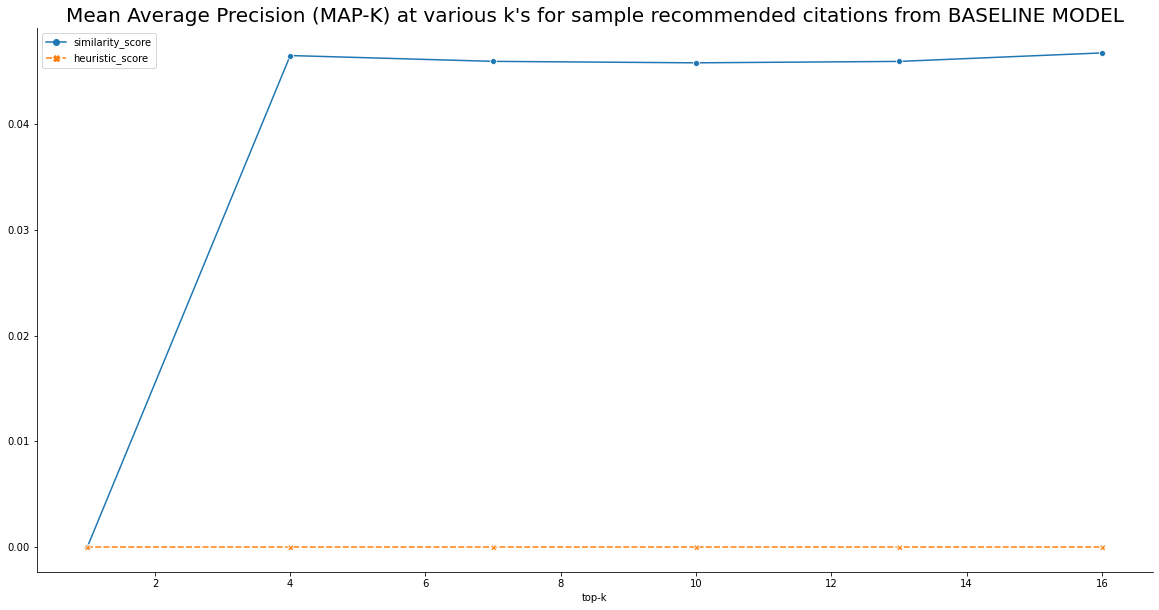

,top-k,similarity_precision,similarity_recall,heuristic_precision,heuristic_recall
0,1,0.000000,0.000000,0.000000,0.000000
1,4,0.080500,0.074995,0.080500,0.074995
2,7,0.067143,0.105348,0.067143,0.105348
3,10,0.056800,0.122266,0.056800,0.122266
4,13,0.048615,0.132652,0.048615,0.132652
5,16,0.044250,0.144245,0.044250,0.144245


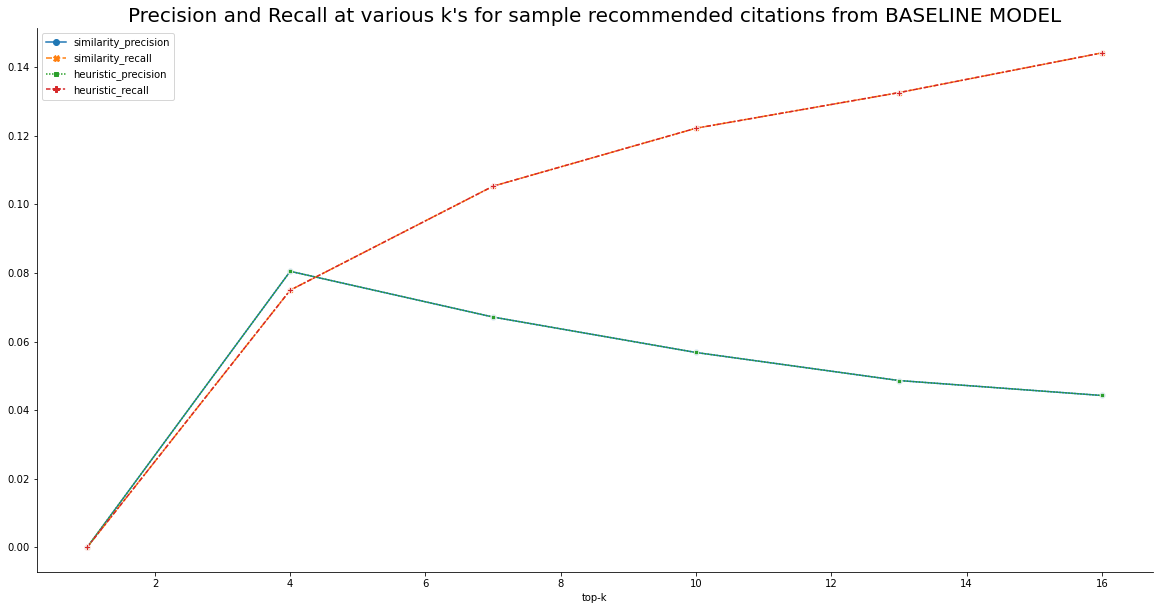

In [18]:
load_and_display_baseline_metrics(cases_data, sample_case_lines, sample_preds)

#### Discussion

    - Very low mean similarities among cited documents
    - This is perhaps due to the high dimensionality of data.
    - TFIDF doesn't capture other factors such as jurisdiction, court and date in similarity calculation.

## Retrival and Ranking Models

All of the training is done via huggingface transformers library. We leverage the APIs from the library to build a retrival and ranking system. All of the supporting code for creating indices and training models can be found in the 
`clf_trainer.ipynb` notebook.

In [19]:
model_paths = model_utils.load_model_paths(SUBSET_DIR, MODELS_DIR)

In [20]:
def load_and_display_model_metrics(embedding_dataset_dir, model_checkpoint, sample_cases):
    MODEL_NAME = model_checkpoint.split('/')[-1]
    print(f"MODEL NAME: {MODEL_NAME}")
    sorted_preds, unsorted_preds = model_utils.load_sorted_preds(embedding_dataset_dir, model_checkpoint, sample_cases)
    sorted_map_scores = metrics.load_map(sample_cases["citation_ids"].tolist(), sorted_preds)
    sorted_pk_scores =  metrics.load_pk(sample_cases["citation_ids"].tolist(), sorted_preds)
    unsorted_map_scores =  metrics.load_map(sample_cases["citation_ids"].tolist(), unsorted_preds)
    unsorted_pk_scores =  metrics.load_pk(sample_cases["citation_ids"].tolist(), unsorted_preds)
    map_title = f"Mean Average Precision (MAP-K) at various k's for sample recommended citations from {MODEL_NAME}"
    metrics.plot_scores(
        sorted_map_scores, unsorted_map_scores, col_names=["SORTED_MAP", "UNSORTED_MAP"],
        index=range(1,17,3), title=map_title)
    metric_names = ["sorted_precision", "sorted_recall", "unsorted_precision", "unsorted_recall"]
    pk_title = f"Precision and Recall at various k's for sample recommended citations from {MODEL_NAME}"
    metrics.plot_pk_scores(sorted_pk_scores, unsorted_pk_scores, col_names=metric_names, index=range(1,17, 3), title=pk_title)


### Metrics and Results

MODEL NAME: legalbert_cls_clf_model
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA A100-PCIE-40GB, compute capability 8.0
Found existing embeddings at ../data/subset/legalbert_cls_embeddings_dataset. loading from disk ...
Found existing fiass index at ../data/subset/legalbert_cls_embeddings_dataset loading from disk ...


,top-k,SORTED_MAP,UNSORTED_MAP
0,1,0.004000,0.001000
1,4,0.003903,0.008354
2,7,0.003928,0.007398
3,10,0.003844,0.006909
4,13,0.003940,0.006848
5,16,0.004048,0.006881


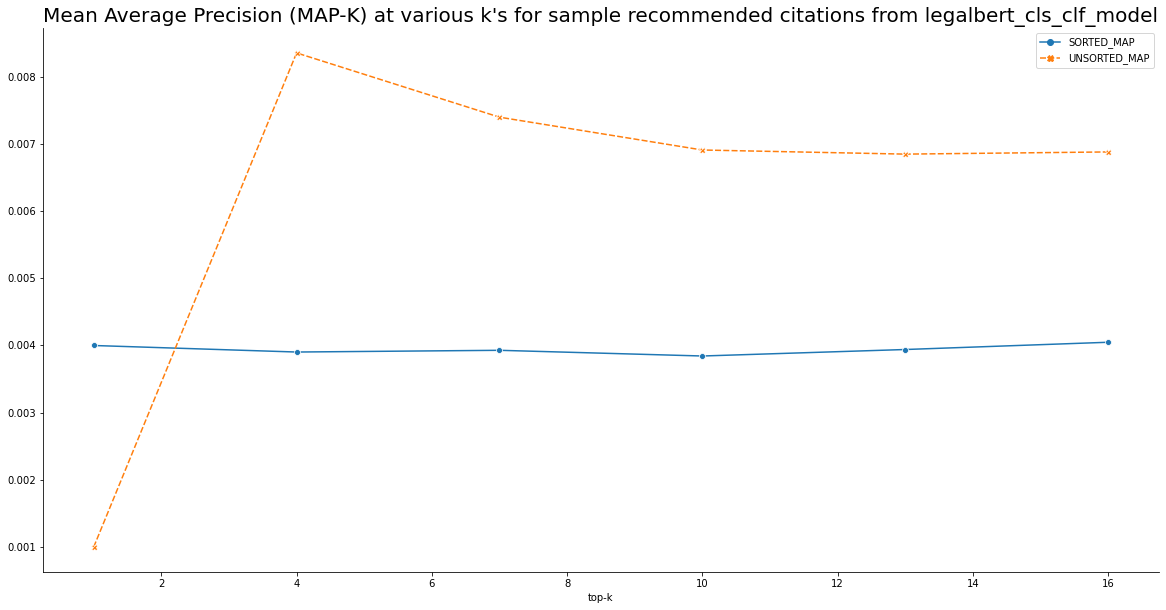

,top-k,sorted_precision,sorted_recall,unsorted_precision,unsorted_recall
0,1,0.004000,0.000354,0.001000,0.000059
1,4,0.007500,0.004869,0.016000,0.010713
2,7,0.008143,0.009488,0.013429,0.017291
3,10,0.008400,0.012511,0.011500,0.020093
4,13,0.008077,0.016729,0.010615,0.023053
5,16,0.007687,0.020651,0.009562,0.025321


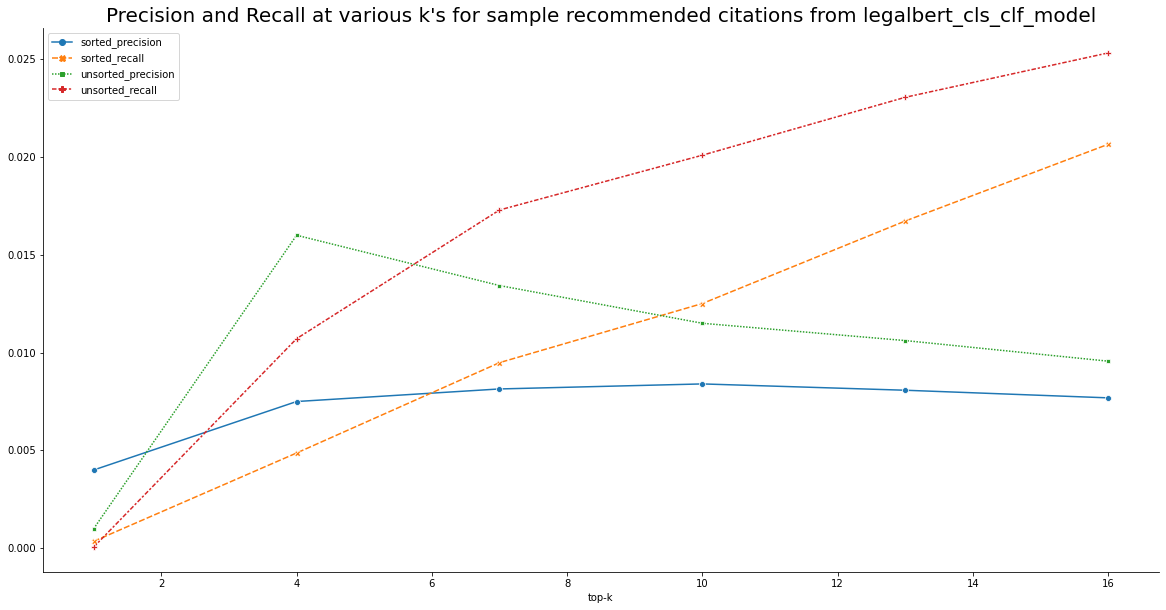

MODEL NAME: specter_cls_clf_model
Found existing embeddings at ../data/subset/specter_cls_embeddings_dataset. loading from disk ...
Found existing fiass index at ../data/subset/specter_cls_embeddings_dataset loading from disk ...


,top-k,SORTED_MAP,UNSORTED_MAP
0,1,0.009000,0.000000
1,4,0.006882,0.016396
2,7,0.007602,0.014910
3,10,0.007620,0.015030
4,13,0.007875,0.015063
5,16,0.008249,0.015195


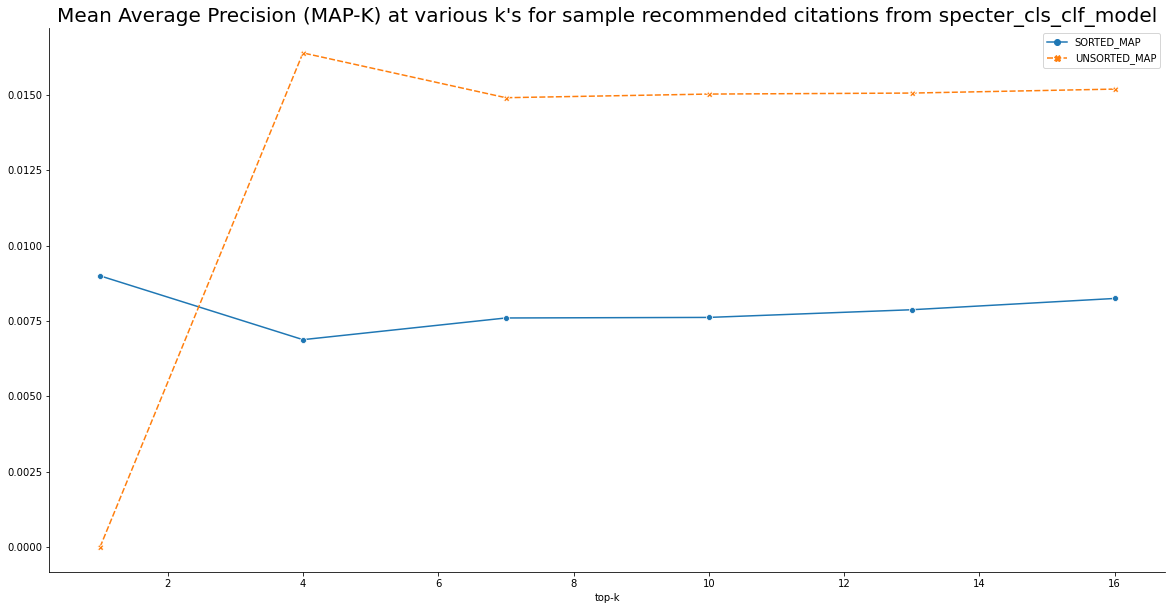

,top-k,sorted_precision,sorted_recall,unsorted_precision,unsorted_recall
0,1,0.009000,0.001106,0.000000,0.000000
1,4,0.012750,0.008234,0.028000,0.027311
2,7,0.014286,0.020387,0.020143,0.034149
3,10,0.013000,0.025590,0.016900,0.041944
4,13,0.011923,0.031620,0.014692,0.046198
5,16,0.011813,0.038273,0.013000,0.049642


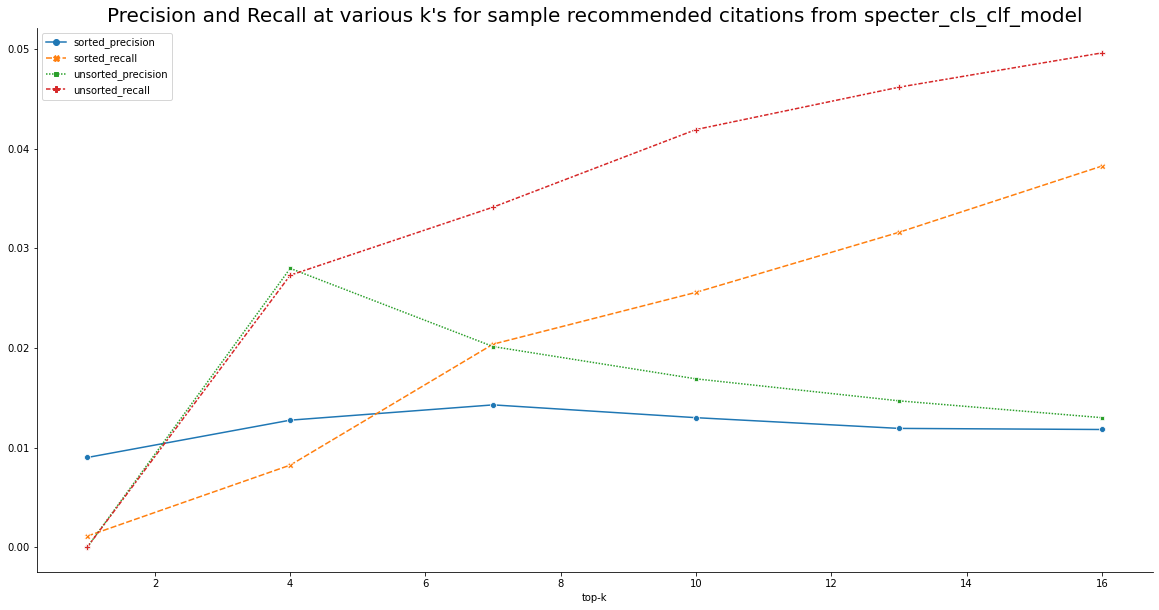

MODEL NAME: specter_pooled_clf_model
Found existing embeddings at ../data/subset/specter_pooled_embeddings_dataset. loading from disk ...
Found existing fiass index at ../data/subset/specter_pooled_embeddings_dataset loading from disk ...


,top-k,SORTED_MAP,UNSORTED_MAP
0,1,0.013000,0.002000
1,4,0.006313,0.011444
2,7,0.006156,0.010674
3,10,0.005968,0.010710
4,13,0.006068,0.011161
5,16,0.006108,0.011259


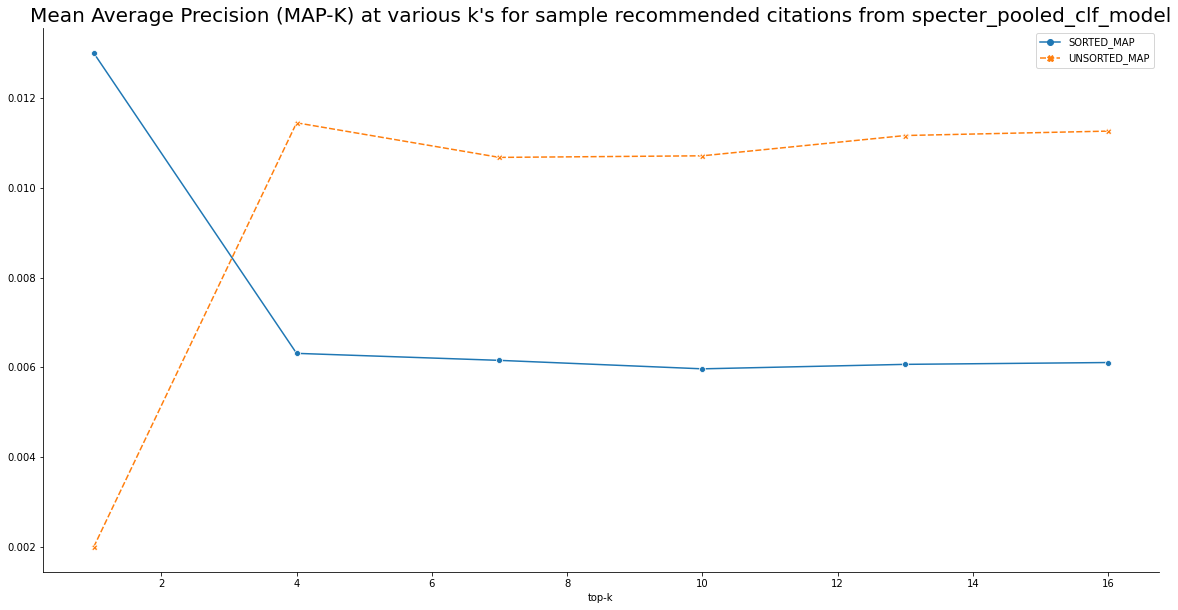

,top-k,sorted_precision,sorted_recall,unsorted_precision,unsorted_recall
0,1,0.013000,0.001614,0.002000,0.000571
1,4,0.009750,0.006055,0.018500,0.019010
2,7,0.011714,0.012884,0.016143,0.025368
3,10,0.010500,0.016677,0.014300,0.031353
4,13,0.009846,0.021115,0.013385,0.038541
5,16,0.009125,0.023640,0.011813,0.041099


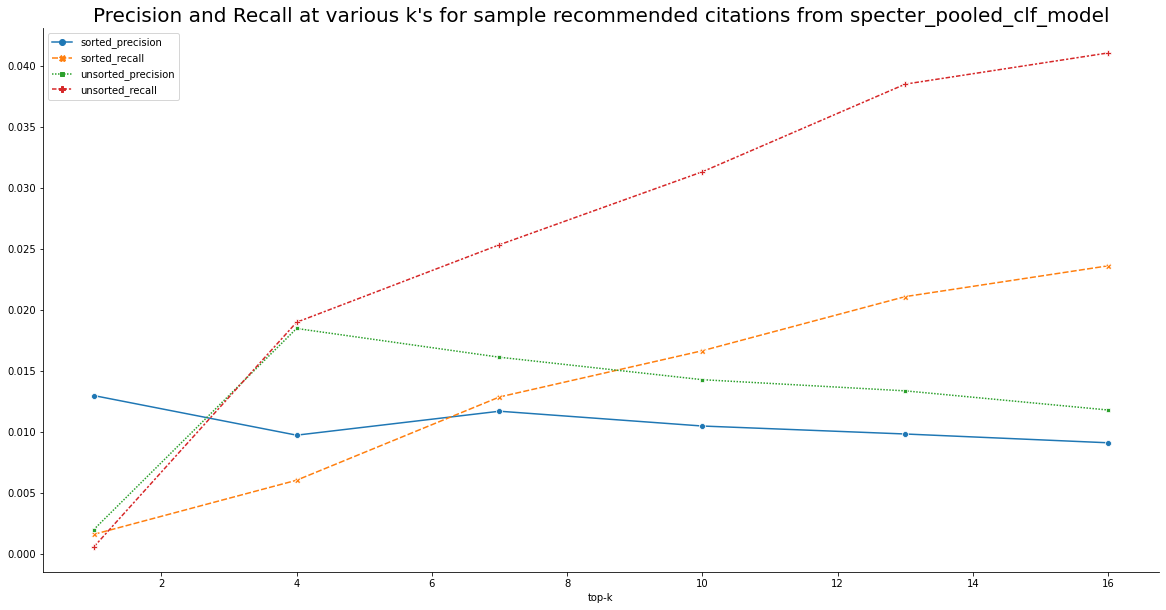

In [21]:
for model_path in model_paths:
    load_and_display_model_metrics(model_path["dataset_dir"], model_path["model_checkpoint"], sample_cases)

#### Discussion

### Results

In [22]:
model_paths

[{'embedding_type': 'legalbert_cls',
  'dataset_dir': '../data/subset/legalbert_cls_embeddings_dataset',
  'model_checkpoint': '../models/legalbert_cls_clf_model'},
 {'embedding_type': 'specter_cls',
  'dataset_dir': '../data/subset/specter_cls_embeddings_dataset',
  'model_checkpoint': '../models/specter_cls_clf_model'},
 {'embedding_type': 'specter_pooled',
  'dataset_dir': '../data/subset/specter_pooled_embeddings_dataset',
  'model_checkpoint': '../models/specter_pooled_clf_model'}]

In [23]:
sorted_preds, unsorted_preds = model_utils.load_sorted_preds(model_paths[0]["dataset_dir"], model_paths[0]["model_checkpoint"], sample_cases)

Found existing embeddings at ../data/subset/legalbert_cls_embeddings_dataset. loading from disk ...
Found existing fiass index at ../data/subset/legalbert_cls_embeddings_dataset loading from disk ...


In [24]:
top_5_preds = [[cite2idx[item] for item in pred][:5] for pred in sorted_preds]

In [59]:
import random
sample_pred = random.sample(list(zip(sample_cases.index, top_5_preds)),1)[0]

In [60]:
query_case = cases_data.loc[sample_pred[0]]
retrieved_cases = cases_data.loc[sample_pred[1]]

In [61]:
print(pd.DataFrame(query_case).T["head_matter"].iloc[0][:1000])

(Nos. 14811-14844.
Reversed and remanded.)
The People’s Gas Light and Coke Company, Appellant, vs. The City of Chicago, Appellee.—The People’s Gas Light and Coke Company, Appellee, vs. The City of Chicago, Appellant.
Opinion filed June 20, 1923.
1. Public utilities — circuit court exercises original jurisdiction in reviewing decision of commission. The circuit court, in reviewing a decision of the Public Utilities Commission, does not exercise appellate jurisdiction but makes an original judicial investigation on the issue as to the reasonableness or lawfulness of the commission’s decision, and the so-called appeal is merely ai method of procedure designed to bring before the court questions of which it has jurisdiction.
2. Same — circuit court must enter final order in reviewing decision of commission. The circuit court, in reviewing a decision of the Public Utilities Commission, must enter a final order as to. the reasonableness or lawfulness of the decision, and has no authority to 

In [62]:
_ = retrieved_cases["head_matter"].map(lambda x: print(f"{x[:1000]}\n\n"))

(No. 12881.
Reversed and remanded.)
Walter E. Greenfield, Appellant, vs. Andrew Russel, Auditor of Public Accounts, et al. Appellees.
Opinion filed April 21, 1920.
1. Equity — when allegations of bill must be taken as true. On the hearing of a petition to file a bill to restrain the disbursement of public moneys by State officers, the allegations of the bill, which accompanies the petition, must be taken as true when sworn to by the petitioner.
2. Constitutional law — legislature can exercise no judicial functions not especially granted by constitution. The legislature cannot exercise any judicial functions except those that are especially granted by the constitution.
3. Same — what powers are 'possessed, by the legislature.’ .The legislature possesses every power not delegated to some other department of the State or to the Federal government or not denied to it by the constitution of the State or of the United States.
4. Same — legislature cannot conduct a judicial investigation of c

# References


1. Chalkidis, I., Fergadiotis, M., Malakasiotis, P., Aletras, N., & Androutsopoulos, I. (2020). LEGAL-BERT: The Muppets straight out of Law School. ArXiv, abs/2010.02559.


2. Arman Cohan and Sergey Feldman and Iz Beltagy and Doug Downey and Daniel S. Weld},SPECTER Document-level Representation Learning using Citation-informed Transformers},CoRR abs/2004.07180

3. Cohan, A., Feldman, S., Beltagy, I., Downey, D., & Weld, D. S. (2020). Document-level Representation Learning using Citation-informed Transformers. arXiv preprint arXiv:2004.07180.

4. Caselaw Access Project. (2021). Retrieved 28th April , 2021, from  https://case.law/exhibits/cite-grid.


5. "Clarence Thomas, a Supreme Court Justice of Few Words, Some ...." 28 Aug. 2015, https://www.nytimes.com/2015/08/28/us/ justice-clarence-thomas-rulings-studies.html. Accessed 28 Apr. 2021.

6.  Färber, M., Jatowt, A. Citation recommendation: approaches and datasets. Int J Digit Libr 21, 375–405 (2020). https://doi.org/10.1007/s00799-020-00288-2.

7.  Tukey, J. W. (1972). Data analysis, computation and mathematics. Quarterly of Applied Mathematics, 30(1), 51-65.

8. Zhong, H., Xiao, C., Tu, C., Zhang, T., Liu, Z., & Sun, M. (2020). How does nlp benefit legal system: A summary of legal artificial intelligence. arXiv preprint arXiv:2004.12158

9. https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py